### Analise de Dados categóricos utilizando um dataset das espécies ameaçadas de extinção

Dados disponíveis em:

- https://dados.gov.br/it/dataset


In [ ]:
!pip install pandas 
!pip install matplotlib

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('lista-de-especies-ameacas-2020.csv', delimiter=';')

In [3]:
df 

,Fauna/Flora,Grupo,Família,Espécie (Simplificado),Nome Comum,Categoria de Ameaça,Sigla Categoria de Ameaça,Bioma,Principais Ameaças,Presença em Áreas Protegidas,Plano de Ação Nacional para Conservação (PAN),Ordenamento Pesqueiro,Nível de Proteção na Estratégia Nacional,Espécie exclusiva do Brasil,Estados de Ocorrência
0,Flora,Angiospermas,Salicaceae,Abatia angeliana,-,Vulnerável (VU),VU,Mata Atlântica,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Sim,Não,2.0,Sim,PR
1,Fauna,Aves,Cracidae,Aburria jacutinga,Jacutinga,Em Perigo (EN),EN,Cerrado; Mata Atlântica,Agropecuária; Assentamento Humano:cidades; Ext...,Sim,Não,Não,4.0,Não,BA; ES; MG; PR; RJ; RS; SC; SP
2,Flora,Angiospermas,Malvaceae,Abutilon anodoides,-,Criticamente em Perigo (CR),CR,Mata Atlântica,Assentamentos Humanos: Cidades,Sim,Sim,Não,2.0,Sim,RJ
3,Flora,Angiospermas,Malvaceae,Abutilon nigricans,-,Criticamente em Perigo (CR),CR,Mata Atlântica,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Não,Não,2.0,Sim,SP
4,Flora,Angiospermas,Santalaceae,Acanthosyris paulo-alvinii,-,Vulnerável (VU),VU,Cerrado,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Não,Não,2.0,Sim,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,Flora,Angiospermas,Orchidaceae,Zygopetalum pabstii,-,Em Perigo (EN),EN,Mata Atlântica,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Não,Não,2.0,Sim,ES
3283,Flora,Angiospermas,Orchidaceae,Zygostates kuhlmannii,-,Em Perigo (EN),EN,Mata Atlântica,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Não,Não,2.0,Sim,ES; PB; PE
3284,Flora,Angiospermas,Orchidaceae,Zygostates linearisepala,-,Criticamente em Perigo (CR),CR,Mata Atlântica,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Não,Não,2.0,Sim,ES
3285,Flora,Angiospermas,Gentianaceae,Zygostigma australe,-,Em Perigo (EN),EN,Mata Atlântica,Extração de Madeira,Sim,Sim,Não,2.0,Não,PR; RJ; RS; SC; SP


In [4]:
df.head(1)

,Fauna/Flora,Grupo,Família,Espécie (Simplificado),Nome Comum,Categoria de Ameaça,Sigla Categoria de Ameaça,Bioma,Principais Ameaças,Presença em Áreas Protegidas,Plano de Ação Nacional para Conservação (PAN),Ordenamento Pesqueiro,Nível de Proteção na Estratégia Nacional,Espécie exclusiva do Brasil,Estados de Ocorrência
0,Flora,Angiospermas,Salicaceae,Abatia angeliana,-,Vulnerável (VU),VU,Mata Atlântica,Perda de Habitat/Degradação (Induzida por Huma...,Sim,Sim,Não,2.0,Sim,PR


In [5]:

df.nunique()

Fauna/Flora                                         2
Grupo                                              12
Família                                           426
Espécie (Simplificado)                           3286
Nome Comum                                        732
Categoria de Ameaça                                 6
Sigla Categoria de Ameaça                           6
Bioma                                              39
Principais Ameaças                                804
Presença em Áreas Protegidas                        3
Plano de Ação Nacional para Conservação (PAN)       2
Ordenamento Pesqueiro                               2
Nível de Proteção na Estratégia Nacional            6
Espécie exclusiva do Brasil                         3
Estados de Ocorrência                             566
dtype: int64

In [ ]:
df['Bioma']

0                Mata Atlântica
1       Cerrado; Mata Atlântica
2                Mata Atlântica
3                Mata Atlântica
4                       Cerrado
                 ...           
3282             Mata Atlântica
3283             Mata Atlântica
3284             Mata Atlântica
3285             Mata Atlântica
3286                        NaN
Name: Bioma, Length: 3287, dtype: object

In [ ]:
df['Nível de Proteção na Estratégia Nacional'].max() #min()

5.0

In [ ]:
df.Grupo.value_counts(dropna=True)

Angiospermas                1999
Peixes Continentais          311
Aves                         234
Invertebrados Terrestres     233
Mamíferos                    110
Peixes Marinhos               98
Pteridófitas                  91
Répteis                       80
Invertebrados Aquáticos       66
Anfíbios                      41
Briófitas                     19
Gimnospermas                   4
Name: Grupo, dtype: int64

In [ ]:
grupo = df.Grupo.unique()

In [6]:
grupos = df.Grupo.value_counts(dropna=True)
grupos = grupos.to_frame()
nomes_grupos = grupos.index
quantidade = grupos['Grupo'].values

In [7]:
quantidade.sum()

3286

<function matplotlib.pyplot.show(close=None, block=None)>

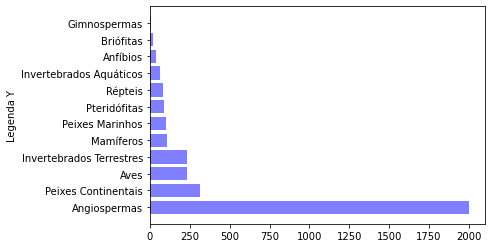

In [10]:
plt.barh(nomes_grupos, quantidade, facecolor = 'blue', alpha = 0.5)
plt.ylabel('Legenda Y')
plt.show

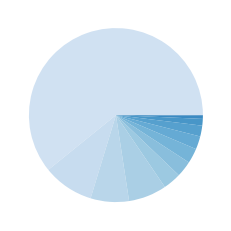

In [15]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(nomes_grupos)))
plt.pie(quantidade, colors=colors)
plt.show()

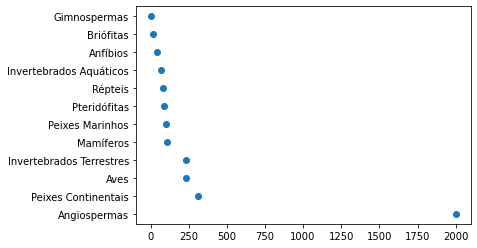

In [22]:
plt.scatter(quantidade, nomes_grupos)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

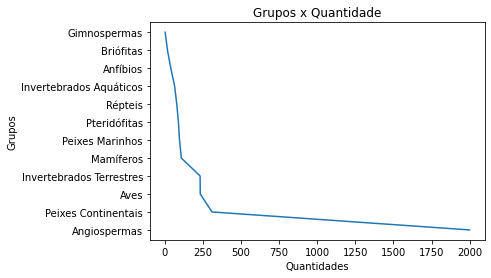

In [ ]:
plt.plot(quantidade,nomes_grupos)
plt.ylabel('Grupos')
plt.xlabel('Quantidades')
plt.title('Grupos x Quantidade')
#plt.savefig('sample_data/grafico.png', dpi=200)
plt.show

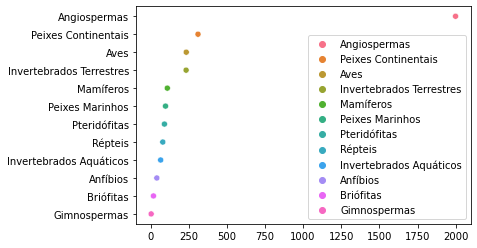

In [34]:
sns.scatterplot(x=quantidade, y=nomes_grupos, hue=nomes_grupos, data=nomes_grupos)
plt.show()

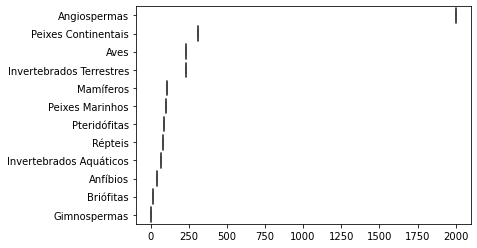

In [55]:
sns.boxplot(x=quantidade, y=nomes_grupos)
plt.show()

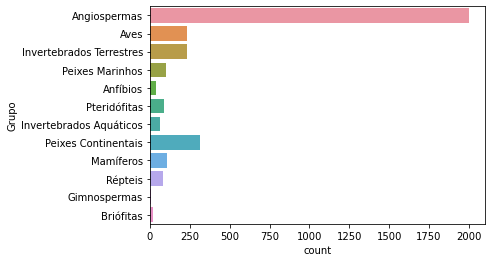

In [50]:
sns.countplot(y=df.Grupo)
plt.show()

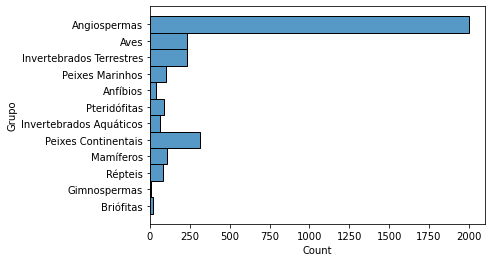

In [52]:
sns.histplot(y=df.Grupo, data=df.Grupo)
plt.show()

In [ ]:
# quantidade de espécies por categória
df['Categoria de Ameaça'].value_counts(dropna=True)

Em Perigo (EN)                                                         1553
Vulnerável (VU)                                                         947
Criticamente em Perigo (CR)                                             767
Criticamente em Perigo (CR)/Possivelmente Extinto (PEX)                  17
Criticamente em Perigo (CR)/Possivelmente Extinto na Natureza (PEW)       1
Extinto na Natureza (EW)                                                  1
Name: Categoria de Ameaça, dtype: int64

<AxesSubplot:>

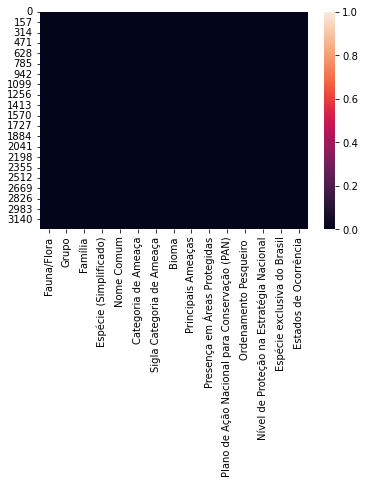

In [67]:
sns.heatmap(df.isnull())

In [68]:
especies = pd.crosstab(df['Grupo'], df['Categoria de Ameaça'])
especies

Categoria de Ameaça,Criticamente em Perigo (CR),Criticamente em Perigo (CR)/Possivelmente Extinto (PEX),Criticamente em Perigo (CR)/Possivelmente Extinto na Natureza (PEW),Em Perigo (EN),Extinto na Natureza (EW),Vulnerável (VU)
Grupo,,,,,,
Anfíbios,17,1,0,12,0,11
Angiospermas,438,0,0,1081,0,480
Aves,36,5,1,71,1,120
Briófitas,2,0,0,15,0,2
Gimnospermas,1,0,0,1,0,2
Invertebrados Aquáticos,18,0,0,23,0,25
Invertebrados Terrestres,77,6,0,81,0,69
Mamíferos,10,2,0,43,0,55
Peixes Continentais,99,2,0,112,0,98


<AxesSubplot:ylabel='Grupo'>

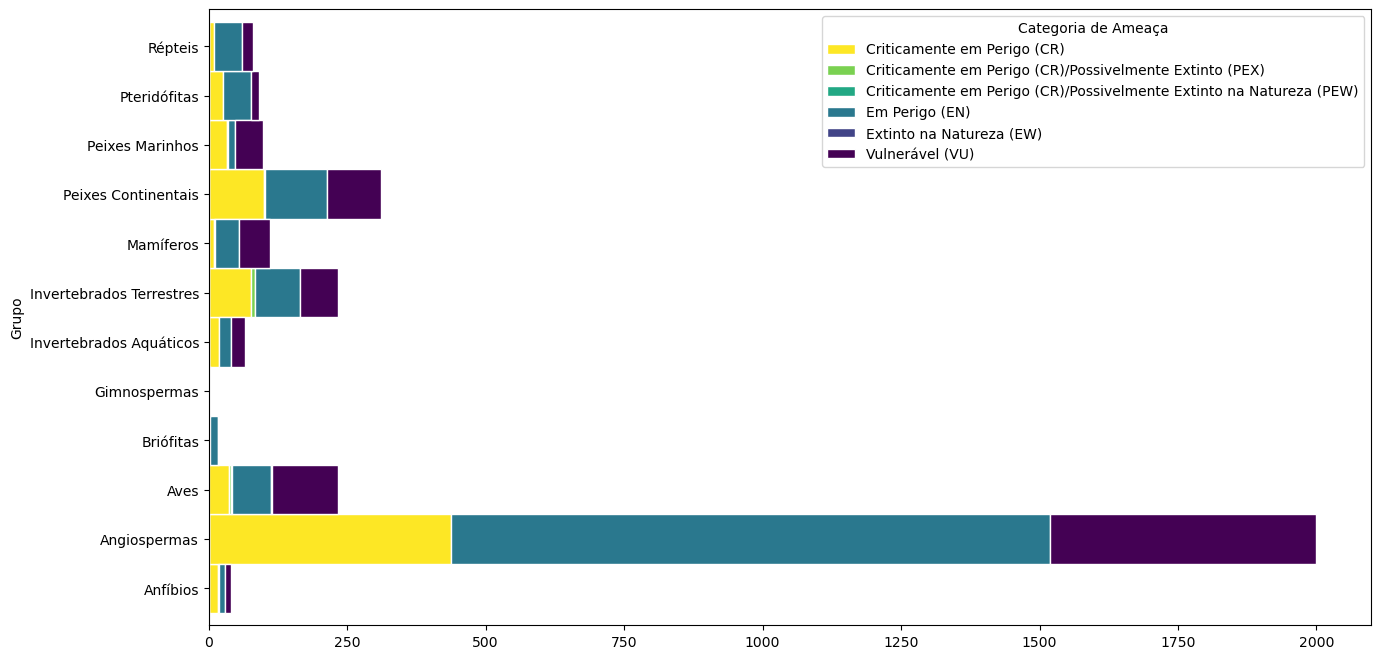

In [69]:
from matplotlib import style

style.use('default')
especies.plot.barh(stacked=True, figsize=[15,8],
             edgecolor='white',
             width=1, 
             colormap='viridis_r')

### Mamíferos

In [72]:
mamiferos = df[df['Grupo']=='Mamíferos']
mamiferos_df = pd.crosstab(mamiferos['Família'], mamiferos['Categoria de Ameaça'], margins=True)
mamiferos_df.head()

Categoria de Ameaça,Criticamente em Perigo (CR),Criticamente em Perigo (CR)/Possivelmente Extinto (PEX),Em Perigo (EN),Vulnerável (VU),All
Família,,,,,
Atelidae,2,0,4,7,13
Balaenidae,0,0,1,0,1
Balaenopteridae,1,0,2,0,3
Bradypodidae,0,0,0,1,1
Callitrichidae,1,0,6,2,9


In [73]:


mamiferos_df = mamiferos_df.drop(['All'], axis=1)
mamiferos_df = mamiferos_df.drop(['All'], axis=0)



<AxesSubplot:title={'center':'Estado de ameaça dos mamíferos'}, ylabel='Família'>

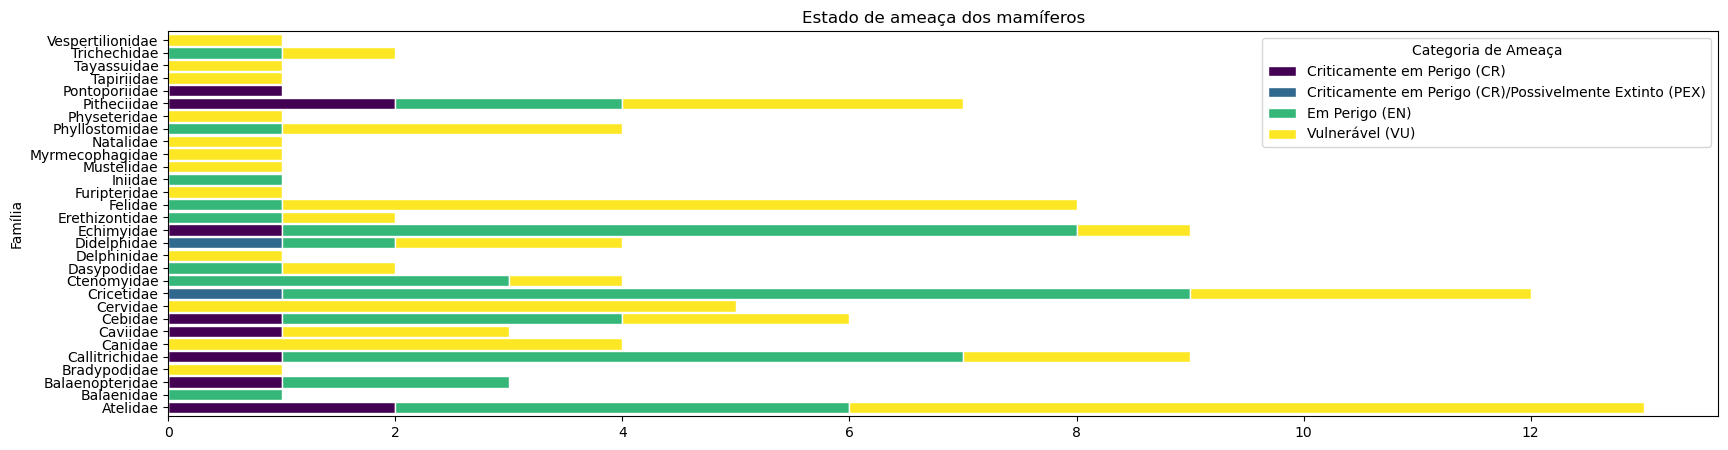

In [75]:
style.use('default')
mamiferos_df.plot.barh(stacked=True, 
                    figsize=[20,5], 
                    colormap='viridis', 
                    edgecolor='white', 
                    width=0.9,
                    title='Estado de ameaça dos mamíferos')